In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom, poisson

# Summary

#### Discrete Distributions:

1. [Binomial Distribution](#Binomial-Distribution)
2. [Bernoulli Distribution](#Bernoulli-Distribution)
3. [Poisson Distribution](#Poisson-Distribution)

#### Continuous Distributions:

1. [Normal Distribution](#Normal-Distribution)

# Binomial Distribution

#### Mathematical Framework and variable definitions:
- **n**: number of trials. Each trial has 2 events: **success** or **fail** (also called **Bernoulli Trial**).
- **k**: number of succeeded trials within the total n of trials.
- **X**: random variable of the number of succeeded trials.
- **p**: percentage of success of each trial.
- **P[X = k]**: probability of a random variable X being equal k.
- **Sample Space = {0, 1, 2, 3, ..., n}**: there are n trials, however the possible values for the random variable X are within the range {0, 1, 2, 3, ..., n} (start from zero, because there is the possibility of not having any succeeded trial).

The formula for the probability P[X = k] is shown below:

\begin{equation*}
P[X = k]   = \frac{n!}{k!(n-k)!} p^k (1-p)^{ n-k}
\end{equation*}

#### Experiment:

Here we can see an example of a random binomial distribution using **n = 5**, **p = 0.8** and **2000000** (2e6) samples. There were a total of **2000000*5 = 10000000 _trials_**, however this means 2000000 samples drawn from the binomial distribution.

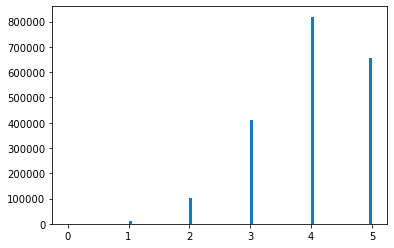

P[X = 0] = 0.0317%
P[X = 1] = 0.6349%
P[X = 2] = 5.1145%
P[X = 3] = 20.4612%
P[X = 4] = 40.9560%
P[X = 5] = 32.8018%


In [2]:
n, p, n_samples = 5, 0.8, int(2e6)
samples = np.random.binomial(n=n, p=p, size=n_samples)
plt.hist(samples, bins=100)
plt.show()
totals = np.zeros(shape=(n+1))
for k in range(n+1):
    totals[k] = (samples == k).sum()
total = totals.sum()
for k in range(n+1):
    print("P[X = {}] = {:.4%}".format(k, totals[k]/total))

Also, we can see the probabilities that resulted from the experiment. Using the formula we can see the expected results below and compare with the experiment results:

In [3]:
for k in range(n+1):
    print("P[X = {}] = {:.4%}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 0] = 0.0320%
P[X = 1] = 0.6400%
P[X = 2] = 5.1200%
P[X = 3] = 20.4800%
P[X = 4] = 40.9600%
P[X = 5] = 32.7680%


Visual example of the formula with k = 0:

\begin{equation*}
P[X = 0]   = \frac{5!}{0!(5-0)!} 0.8^0 (1-0.8)^{ 5-0} = 0.032/100
\end{equation*}

# Bernoulli Distribution

The Bernoulli Distribution is a special case of the Binomial Distribution: when **n = 1**. So the sample space is **{0, 1}**.

\begin{equation*}
P[X = k]   = p^k (1-p)^{ 1-k}
\end{equation*}

#### Experiment:

Here we can see an example of a random Bernoulli distribution using **p = 0.5** (for example a coin toss) and **2000000** (2e6) samples. There were a total of **2000000 _trials_**, which is the number of samples drawn from the distribution.

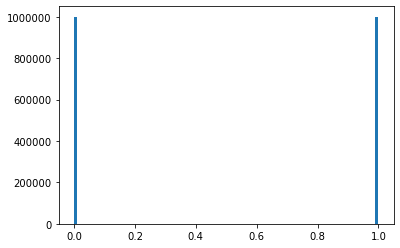

p[X = 0] = 49.9738%
p[X = 1] = 50.0262%


In [4]:
n, p, n_samples = 1, 0.5, int(2e6)
samples = np.random.binomial(n=n, p=p, size=n_samples)
plt.hist(samples, bins=100)
plt.show()
totals = np.zeros(shape=(n+1))
for k in range(n+1):
    totals[k] = (samples == k).sum()
total = totals.sum()
for k in range(n+1):
    print("p[X = {}] = {:.4%}".format(k, totals[k]/total))

In [5]:
for k in range(n+1):
    print("P[X = {}] = {:.4%}".format(k, round(binom.pmf(k=k, n=n, p=p), 7)))

P[X = 0] = 50.0000%
P[X = 1] = 50.0000%


Visual example of the formula with k = 0:

\begin{equation*}
P[X = 0]   = 0.5^0 (0.5)^{ 1-0} = 50/100
\end{equation*}

# Poisson Distribution

#### Mathematical Framework and variable definitions:

It is a model used for **discrete series of events** when we know the **average time, area, volume** between the events. More generally, it can be used when we know the **average occurrence rate of the events per interval**, but the **exact unit of occurrence within the interval is random**.

- **λ**: average number of events in the interval.
- **k**: number of occurrences within the interval.
- **X**: random variable of the number of occurrences within the interval.
- **P[X = k]**: probability of a random variable X being equal k.
- **Sample Space = {0, 1, 2, 3, ..., ∞}**: the random variable X can have an infinite number of events.

Assumptions:

- Events are independent of each other. The occurrence of one event does not affect the probability another event will occur.
- The average rate (events per unit) is constant.
- Two events cannot occur at the same time (or same unit - area, volume).

The formula for the probability P[X = k] is shown below:

\begin{equation*}
P[X = k]   = e^{-λ} \frac{λ^{k}}{k!}
\end{equation*}

#### Experiment:

Here we can see an example of a Poisson distribution using **λ = 10** (for example 10 car accidents within 2 hours), and **2000000** (2e6) samples.

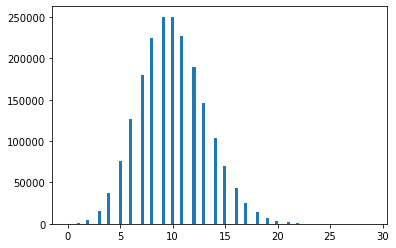

P[X = 0] = 0.0046%
P[X = 1] = 0.0436%
P[X = 2] = 0.2270%
P[X = 3] = 0.7654%
P[X = 4] = 1.8991%
P[X = 5] = 3.7974%
P[X = 6] = 6.3503%
P[X = 7] = 9.0567%
P[X = 8] = 11.2839%
P[X = 9] = 12.5493%
P[X = 10] = 12.5674%
P[X = 11] = 11.4045%
P[X = 12] = 9.4898%
P[X = 13] = 7.3063%
P[X = 14] = 5.2265%
P[X = 15] = 3.4910%
P[X = 16] = 2.1681%
P[X = 17] = 1.2833%
P[X = 18] = 0.7126%
P[X = 19] = 0.3732%


In [6]:
lam, n_samples = 10, int(2e6)
samples = np.random.poisson(lam=lam, size=n_samples)
plt.hist(samples, bins=100)
plt.show()
totals = np.zeros(shape=(2*lam))
for k in range(2*lam):
    totals[k] = (samples == k).sum()
total = totals.sum()
for k in range(2*lam):
    print("P[X = {}] = {:.4%}".format(k, totals[k]/total))

Also, we can see the probabilities that resulted from the experiment. Using the formula we can see the expected results below and compare with the experiment results:

In [7]:
for k in range(2*lam):
    print("P[X = {}] = {:.4%}".format(k, round(poisson.pmf(k=k, mu=lam), 7)))

P[X = 0] = 0.0045%
P[X = 1] = 0.0454%
P[X = 2] = 0.2270%
P[X = 3] = 0.7567%
P[X = 4] = 1.8917%
P[X = 5] = 3.7833%
P[X = 6] = 6.3056%
P[X = 7] = 9.0079%
P[X = 8] = 11.2599%
P[X = 9] = 12.5110%
P[X = 10] = 12.5110%
P[X = 11] = 11.3736%
P[X = 12] = 9.4780%
P[X = 13] = 7.2908%
P[X = 14] = 5.2077%
P[X = 15] = 3.4718%
P[X = 16] = 2.1699%
P[X = 17] = 1.2764%
P[X = 18] = 0.7091%
P[X = 19] = 0.3732%


Visual example of the formula with k = 0:

\begin{equation*}
P[X = 0]   = e^{-10} \frac{λ^{0}}{0!} = 0.0045/100
\end{equation*}

Poisson Distribution is the Binomial Distribution with n -> ∞.

# Normal Distribution

In [8]:
mu, sigma = 0, 1
samples = np.random.normal(loc=mu, scale=sigma, size=1000)

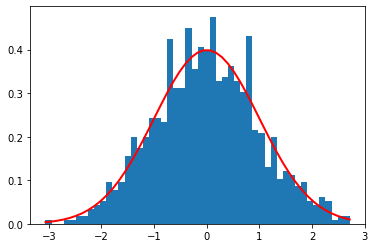

In [9]:
count, bins, ignored = plt.hist(samples, 50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()